In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

f:\miniconda3\envs\tf-gpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
tf .__version__

'2.10.0'

In [3]:
model = load_model('improved_model.keras')

In [4]:
class_labels = ['dry', 'normal', 'oily',]

In [5]:
def import_and_predict(image_path, model, class_labels=class_labels, target_size=(224, 224)):
    # Load and preprocess image
    image = load_img(image_path, target_size=target_size)
    img_array = img_to_array(image) / 255.0  # Normalize to [0, 1]
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Predict class probabilities
    predictions = model.predict(img_array)[0]  # shape: (4,)

    # Get the predicted class
    predicted_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_index]
    confidence = predictions[predicted_index] * 100

    # Format result
    result = f"Prediction: {predicted_label} ({confidence:.2f}%)"
    return result,plt.imshow(image)

1/1 [==============================] - 8s 8s/step


('Prediction: dry (36.35%)', <matplotlib.image.AxesImage at 0x2569a27c4f0>)

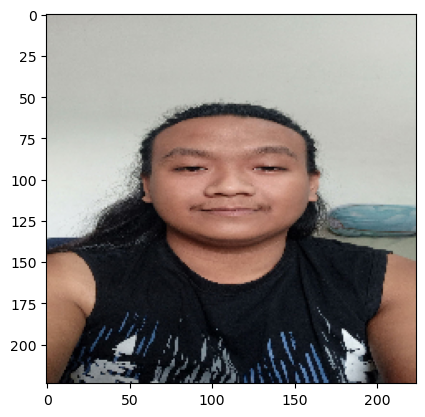

In [6]:
import_and_predict('detect.jpg', model)